In [1]:
#Import Required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [2]:
# Read timeline csv and establish list of names and dates
timeline = pd.read_csv('Timeline.csv')

timeline['Date'] = pd.to_datetime(timeline['Timeline_Category'])

timeline.drop(columns = ['Timeline_Category'], inplace = True)

names = timeline['USGS Flood Event Name']
dates = timeline['Date']

In [3]:
# Establish heights that allow all labels to be shown
# This was iterated to get the right levels
timeline['height'] = [1, 3, 5, -3, 1, 3, 5, -3, 1, 3, 5, 2, 4, 6, 1, 3, -3, 7, 8]

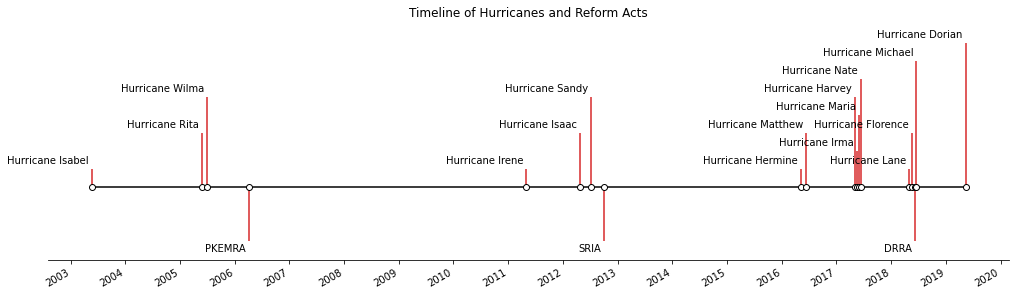

In [4]:
# Plot Timeline
#Adapted from https://matplotlib.org/3.1.3/gallery/lines_bars_and_markers/timeline.html

levels = timeline['height']

fig, ax = plt.subplots(figsize=(14, 4), constrained_layout=True)
ax.set(title="Timeline of Hurricanes and Reform Acts")

markerline, stemline, baseline = ax.stem(dates, levels,
                                         linefmt="C3-", basefmt="k-",
                                         use_line_collection=True)

plt.setp(markerline, mec="k", mfc="w", zorder=3)

markerline.set_ydata(np.zeros(len(dates)))

vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
for d, l, r, va in zip(dates, levels, names, vert):
    ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points", va=va, ha="right")
ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=12))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

ax.margins(y=0.1)
plt.savefig('images/timeline.jpg')